%%latex
\tableofcontents

# Preparations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# ENV_NAME = 'colab'
ENV_NAME = 'local'
path_prefix = {'colab': '/content/drive/MyDrive/ComputerVision/CV-Phase1/', 
                'local': './Images/'}

Open image using pyplot:

In [3]:
def loadImage(name, path_prefix=path_prefix[ENV_NAME]):
  image = plt.imread(path_prefix + name)
  print(image.shape)
  print(type(image))
  return image

(512, 512, 3)
<class 'numpy.ndarray'>
(568, 797, 3)
<class 'numpy.ndarray'>
(600, 800, 3)
<class 'numpy.ndarray'>
(599, 799, 3)
<class 'numpy.ndarray'>


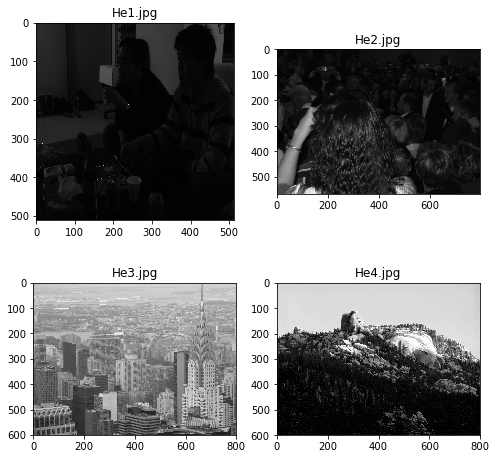

In [4]:
he1 = loadImage('he1.jpg')
he2 = loadImage('he2.jpg')
he3 = loadImage('he3.jpg')
he4 = loadImage('he4.jpg')
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for i, img in enumerate([he1, he2, he3, he4]):
  ax[i//2, i%2].imshow(img)
  ax[i//2, i%2].set_title('He{}.jpg'.format(i+1))
plt.show()

All these images ar black and white, so it's best we do the following changes on their greyscale versions.

In [5]:
def rgb2grey(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

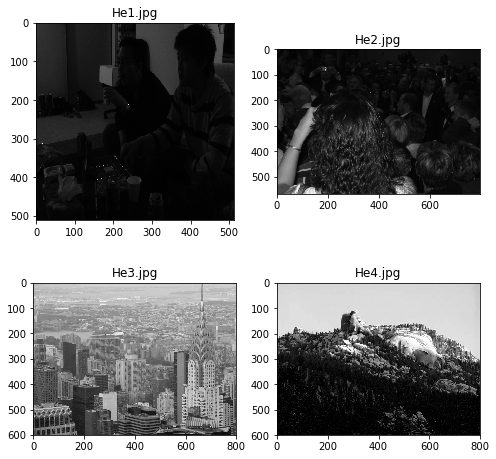

In [6]:
he1 = rgb2grey(he1)
he2 = rgb2grey(he2)
he3 = rgb2grey(he3)
he4 = rgb2grey(he4)
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for i, img in enumerate([he1, he2, he3, he4]):
    ax[i//2, i%2].imshow(img, cmap='gray')
    ax[i//2, i%2].set_title('He{}.jpg'.format(i+1))
plt.show()

# Histogram Equalization

## Algorithm

In [7]:
def chunks(lst, n):
    step = len(lst)//n
    for i in range(0, len(lst), step):
        yield lst[i:i + step]

def get_hist(img, bn=256):
    bins = list(chunks(range(0,256), bn))
    bins = np.array([sum(x)/len(x) for x in bins])
    hist = np.zeros(bn+1)
    for px in img:
        hist[np.digitize(px, bins)] += 1
    return hist

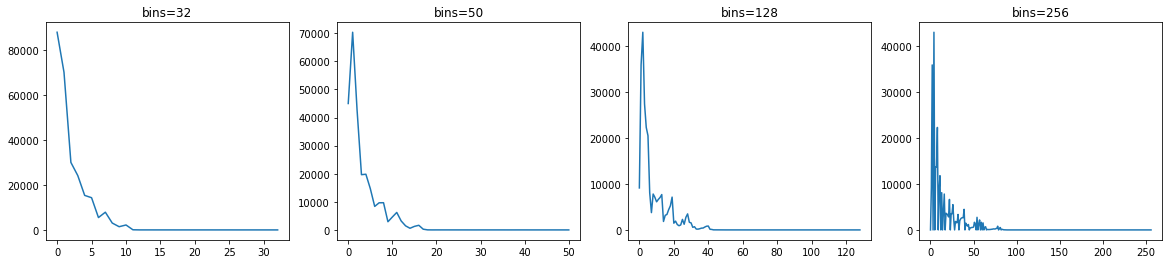

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
flat = (he1.flatten()).astype(np.uint8)
for i, b in enumerate([32, 50, 128, 256]):
    hist = get_hist(flat, b)
    axs[i%4].plot(hist)
    axs[i%4].set_title('bins={}'.format(b))
plt.show()

Function `cumulative_sum()` is a helper function that calculates the cumulative sum of the histogram. Note that this sum is not normalised.

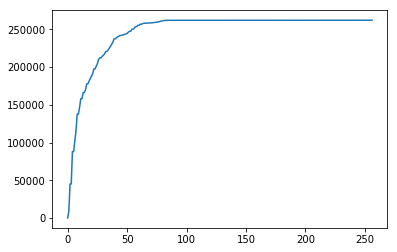

In [8]:
flat = (he1.flatten()).astype(np.uint8)
hist = get_hist(flat, 256)
def cumulative_sum(arr):
    arr = iter(arr)
    s = [next(arr)]
    for i in arr:
        s.append(s[-1] + i)
    return np.array(s)

cs = cumulative_sum(hist)
plt.plot(cs)

The image's accumulated *normalised* histogram is found as follows:
$${cdf_x(i) = \sum^i_{j=0}{\dfrac{n_j}{N}}}$$
We can normalise the sum to be between 0 and 255.

In [9]:
def normalise(cs):
    nj = (cs - cs.min()) * 255
    N = cs.max() - cs.min()
    cdf = nj / N
    cdf = cdf.astype('uint8')
    return cdf

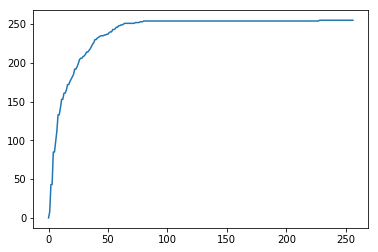

In [34]:
cdf = normalise(cs)
plt.plot(cdf)

Using the cumulative sum, we can create a new, equalised histogram.

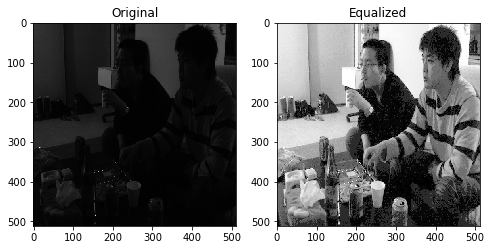

In [36]:
eq_he1 = cdf[flat]
eq_he1 = eq_he1.reshape(he1.shape)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(he1, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(eq_he1, cmap='gray')
ax[1].set_title('Equalized')
plt.show()

And their histograms:

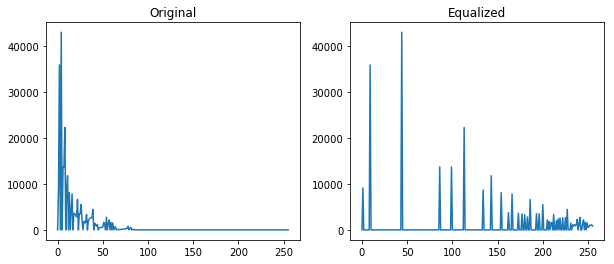

In [105]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
og_hist = get_hist(flat, 256)
eq_hist = get_hist(eq_he1.flatten().astype(np.uint8), 256)
axs[0].plot(og_hist)
axs[0].set_title('Original')
axs[1].plot(eq_hist)
axs[1].set_title('Equalized')
plt.show()

The equalisation is more visible in log scale:

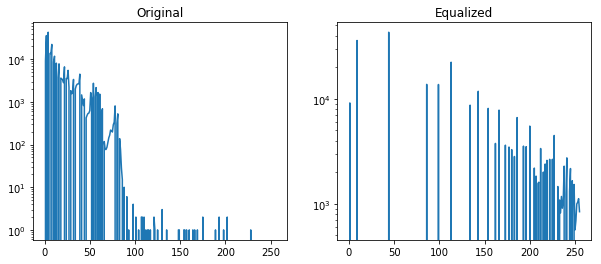

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(og_hist)
axs[0].set_title('Original')
axs[0].set_yscale('log')
axs[1].plot(eq_hist)
axs[1].set_yscale('log')
axs[1].set_title('Equalized')
plt.show()

Now we can repeat the process for the other images.

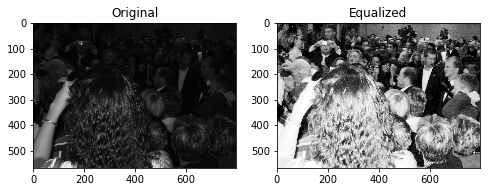

In [16]:
flat = (he2.flatten()).astype(np.uint8)
hist = get_hist(flat, 256)
cs = cumulative_sum(hist)
cdf = normalise(cs)
eq_he2 = cdf[flat]
eq_he2 = eq_he2.reshape(he2.shape)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(he2, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(eq_he2, cmap='gray')
ax[1].set_title('Equalized')
plt.show()

And their histograms:

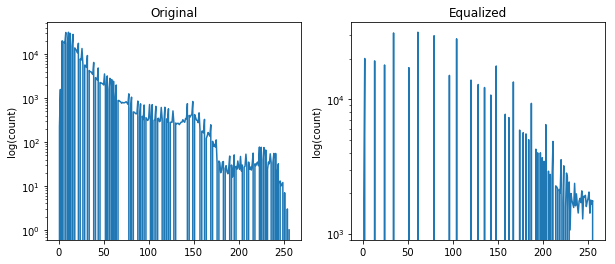

In [171]:
eq_hist = get_hist(eq_he2.flatten().astype(np.uint8), 256)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(hist)
axs[0].set_title('Original')
axs[0].set_yscale('log')
axs[0].set_ylabel('log(count)')

axs[1].plot(eq_hist)
axs[1].set_yscale('log')
axs[1].set_ylabel('log(count)')
axs[1].set_title('Equalized')
plt.show()

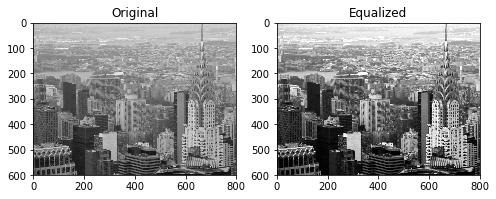

In [18]:
flat = (he3.flatten()).astype(np.uint8)
hist = get_hist(flat, 256)
cs = cumulative_sum(hist)
cdf = normalise(cs)
eq_he3 = cdf[flat]
eq_he3 = eq_he3.reshape(he3.shape)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(he3, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(eq_he3, cmap='gray')
ax[1].set_title('Equalized')
plt.show()

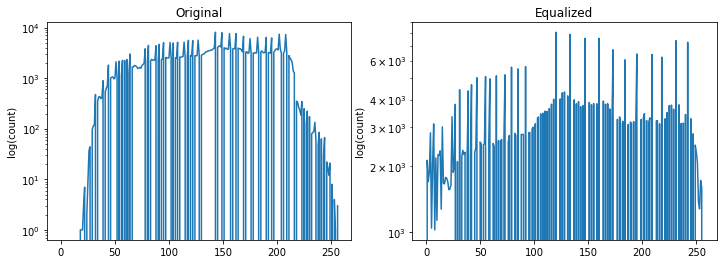

In [19]:
eq_hist = get_hist(eq_he3.flatten().astype(np.uint8), 256)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist)
axs[0].set_title('Original')
axs[0].set_yscale('log')
axs[0].set_ylabel('log(count)')

axs[1].plot(eq_hist)
axs[1].set_yscale('log')
axs[1].set_ylabel('log(count)')
axs[1].set_title('Equalized')
plt.show()

The last image preforms poorly after equalisation.

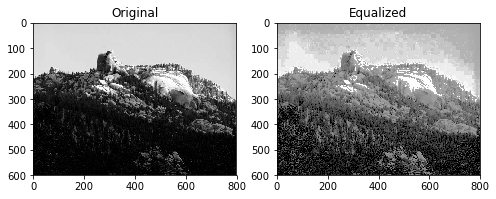

In [42]:
flat = (he4.flatten()).astype(np.uint8)
hist = get_hist(flat, 256)
cs = cumulative_sum(hist)
cdf = normalise(cs)
eq_he4 = cdf[flat]
eq_he4 = eq_he4.reshape(he4.shape)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(he4, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(eq_he4, cmap='gray')
ax[1].set_title('Equalized')
plt.show()

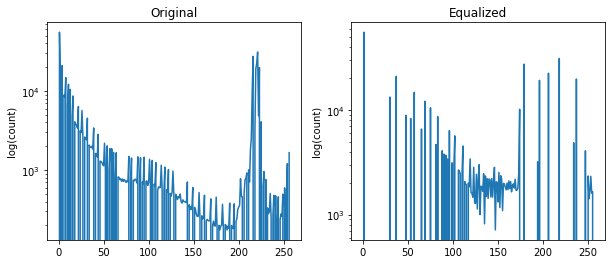

In [175]:
eq_hist = get_hist(eq_he4.flatten().astype(np.uint8), 256)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(hist)
axs[0].set_title('Original')
axs[0].set_yscale('log')
axs[0].set_ylabel('log(count)')

axs[1].plot(eq_hist)
axs[1].set_yscale('log')
axs[1].set_ylabel('log(count)')
axs[1].set_title('Equalized')
plt.show()

## Histogram Equalisation Blending
Given image $f$ and its equalised version $f_{HE}$ we can blend the two images using the following formula:
$$g = \alpha f + (1-\alpha) f_{HE}$$
where $\alpha$ is a blending factor.
Using this, we observe the results for different blending factors in range [0.1,0.5]

In [176]:
def blend_eq(img, img_he, alpha):
    blend = np.zeros(img.shape, dtype=np.uint8)
    blend = img * alpha + img_he * (1 - alpha)
    return blend

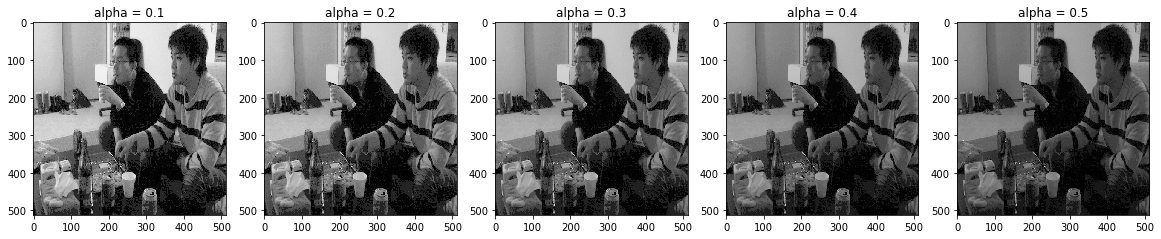

In [179]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
for i, a in enumerate([0.1, 0.2, 0.3, 0.4, 0.5]):
    blend = blend_eq(he1, eq_he1, a)
    axs[i].imshow(blend, cmap='gray')
    axs[i].set_title('alpha = {}'.format(a))
plt.show()

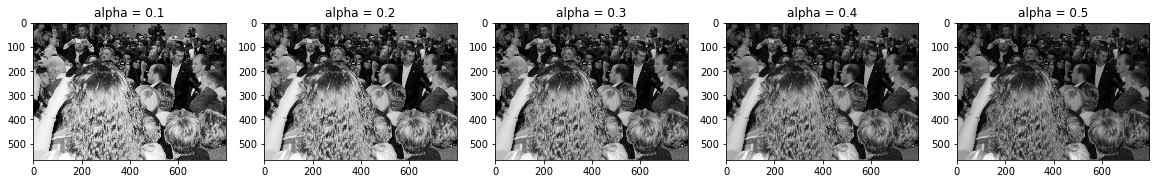

In [180]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
for i, a in enumerate([0.1, 0.2, 0.3, 0.4, 0.5]):
    blend = blend_eq(he2, eq_he2, a)
    axs[i].imshow(blend, cmap='gray')
    axs[i].set_title('alpha = {}'.format(a))
plt.show()

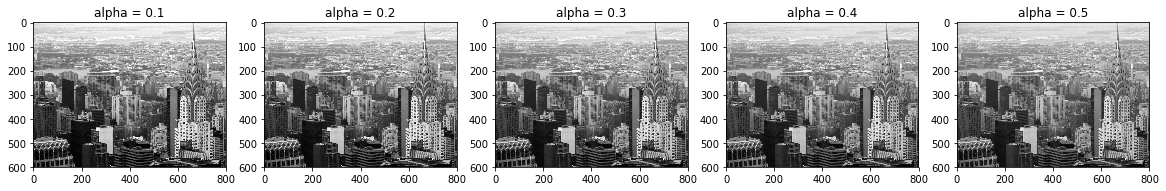

In [181]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
for i, a in enumerate([0.1, 0.2, 0.3, 0.4, 0.5]):
    blend = blend_eq(he3, eq_he3, a)
    axs[i].imshow(blend, cmap='gray')
    axs[i].set_title('alpha = {}'.format(a))
plt.show()

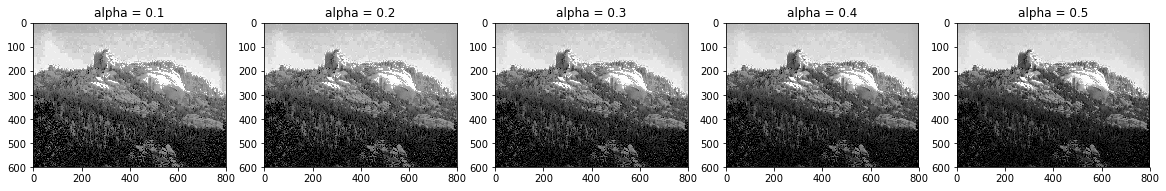

In [182]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
for i, a in enumerate([0.1, 0.2, 0.3, 0.4, 0.5]):
    blend = blend_eq(he4, eq_he4, a)
    axs[i].imshow(blend, cmap='gray')
    axs[i].set_title('alpha = {}'.format(a))
plt.show()

# Local Histogram Equalisation
## Classic Algorithm
LHE is a local version of HE, where the histogram is only calculated for a small region of the image. This is done by using a sliding window and calculating the histogram for each window.

We start by `he4.jpg` but we first have to resize the image as the classical approach is too slow for the large image. For this purpose, resize function from cv2 is used.

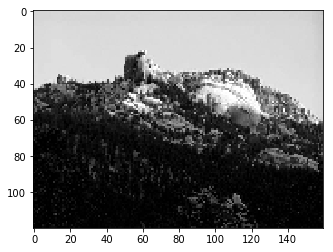

In [12]:
import cv2
he4_res = cv2.resize(he4, (0,0), fx=0.2, fy=0.2)
plt.imshow(he4_res, cmap='gray')

Then we pad the image so the sliding window can work on all the image, and we create a mask to indicate the area of the image that we want to calculate the histogram. Each iteration preforms a full HE on the window locally, then proceed to the next window.

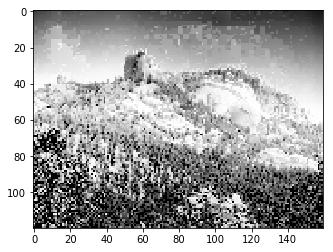

In [17]:
window_size = 51
he4_pad = np.pad(he4_res, window_size//2, 'reflect')
he4_lhe = np.copy(he4_pad)
for x in range(window_size//2, he4_res.shape[0]):
    for y in range(window_size//2, he4_res.shape[1]):
        flat = (he4_pad[x - window_size//2 : x + window_size//2 + 1, y - window_size//2 : y + window_size//2 + 1].flatten()).astype(np.uint8)
        hist = get_hist(flat, 256)
        cs = cumulative_sum(hist)
        cdf = normalise(cs)
        window_eq = cdf[flat]
        he4_lhe[x - window_size//2 : x + window_size//2 + 1, y - window_size//2 : y + window_size//2 + 1] = window_eq.reshape(he4_lhe[x - window_size//2 : x + window_size//2 + 1, y - window_size//2 : y + window_size//2 + 1] .shape)

he4_lhe = he4_lhe[window_size//2 : he4_res.shape[0] + window_size//2, window_size//2 : he4_res.shape[1] + window_size//2]
plt.imshow(he4_lhe, cmap='gray')

Now we attempt the same thing for other window sizes.

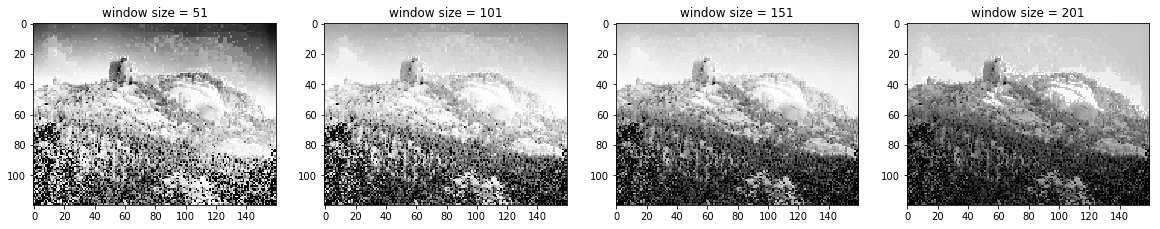

In [18]:
window_sizes = [51, 101, 151, 201]
fig, axs = plt.subplots(1,4, figsize=(20,4))
for i, w in enumerate(window_sizes):
    he4_pad = np.pad(he4_res, w//2, 'reflect')
    he4_lhe = np.copy(he4_pad)
    for x in range(w//2, he4_res.shape[0] + w//2):
        for y in range(w//2, he4_res.shape[1] + w//2):
            flat = (he4_pad[x - w//2 : x + w//2, y - w//2 : y + w//2].flatten()).astype(np.uint8)
            hist = get_hist(flat, 256)
            cs = cumulative_sum(hist)
            cdf = normalise(cs)
            window_eq = cdf[flat]
            he4_lhe[x - w//2 : x + w//2, y - w//2 : y + w//2] = window_eq.reshape(he4_lhe[x - w//2 : x + w//2, y - w//2 : y + w//2] .shape)
    he4_lhe = he4_lhe[w//2 : he4_res.shape[0] + w//2, w//2 : he4_res.shape[1] + w//2]
    axs[i].imshow(he4_lhe, cmap='gray')
    axs[i].set_title('window size = {}'.format(w))
plt.imshow(he4_lhe, cmap='gray')

Larger window sizes cause the calculation to approximate the global HE, while smaller window sizes preform more locally and are generally faster too.

## Fast LHE with Interpolation
LHE in its classic implementation is very slow, since it essentially calculates the histogram for each pixel over a large window. To speed up the process, we can take larger steps in sliding windows, and calculate the middle points using interpolation.
For better results, we need even-sized windows, i.e. 50×50, 100×100, etc.

The core of LHE function calculates CDF's for each window and slides it by half the window size. The CDF's are saved into a dictionary by their centre points, and returned for use with an interpolation function. `fast_lhe()` doesn't return the image itself.

In [19]:
def fast_lhe(img, w):
    """
    fast local histogram equalisation returning only a dictionary of CDF's
    Keyword arguments:
    img -- the image to be equalised
    w -- the window size (even)
    Returns:
    cdf -- a dictionary of CDF's
    """
    cdfs = {}
    # padding that doesn't generate false data
    img_pad = np.pad(img, w//2, 'reflect')
    for x in range(w//2, img_pad.shape[0] - w//2 + 1, w//2):
        for y in range(w//2, img_pad.shape[1] - w//2 + 1, w//2):
            flat = (img_pad[x - w//2 : x + w//2, y - w//2 : y + w//2].flatten()).astype(np.uint8)
            hist = get_hist(flat, 256)
            cs = cumulative_sum(hist)
            cdf = normalise(cs)
            window_eq = cdf[flat]
            cdfs[(x,y)] = cdf[flat].reshape(img_pad[x - w//2 : x + w//2, y - w//2 : y + w//2].shape)
    return cdfs

In [20]:
def interp_lhe(img, cdfs, w):
    """
    Interpolate the cdfs to the image
    uses nearest neighbour for border pixels and bilinear interpolation for the rest
    Keyword arguments:
    img -- the image to interpolate
    cdfs -- a dictionary of cdfs by centre point
    w -- the window size
    Returns:
    img_lhe -- the interpolated image
    """	
    img_pad = np.pad(img, w//2, 'reflect')
    img_lhe = np.zeros(img_pad.shape)
    print(img_pad.shape)
    # preform interpolation on the image,
    # use nearest neighbor for borders and bilinear for the rest
    for x in range(w//2, img_pad.shape[0] - w//2 + 1):
        for y in range(w//2, img_pad.shape[1] - w//2 + 1):
            # find closest centres
            x_lower = int(x // (w/2) * w/2)
            x_upper = int(x_lower + w/2)
            y_lower = int(y // (w/2) * w/2)
            y_upper = int(y_lower + w/2)
            if (abs(x-x_lower) < abs(x-x_upper)) or x_upper > img_pad.shape[0] - w//2:
                xnn = x_lower
            else:
                xnn = x_upper
            if (abs(y-y_lower) < abs(y-y_upper)) or y_upper > img_pad.shape[1] - w//2:
                ynn = y_lower
            else:
                ynn = y_upper
            ox = int(((xnn // (w/2)) - 1) * w/2)
            oy = int(((ynn // (w/2)) - 1) * w/2)
            # use NN for border pixels
            if min(x, ox) == x or min(y, oy) == y \
                or x_upper >= img_pad.shape[0] - w//2 \
                or y_upper >= img_pad.shape[1] - w//2:
                pixel = cdfs[(xnn, ynn)][min(x, int(x - ox)), min(y, int(y - oy))]
            # use bilinear interpolation for the rest
            else:
                # find coordination of pixel in 4 nearest quadrants
                # and save the values of cdf in those quadrants
                aox = int(x - (x_lower // (w/2) - 1) * w/2)
                aoy = int(y - (y_lower // (w/2) - 1) * w/2)
                a = cdfs[(x_lower, y_lower)][min(x, aox), min(y,aoy)]                 
                box = int(x - (x_lower // (w/2) - 1) * w/2)
                boy = int(y - (y_upper // (w/2) - 1) * w/2)
                b = cdfs[(x_lower, y_upper)][min(x, box), min(y, boy)]
                cox = int(x - (x_upper // (w/2) - 1) * w/2)
                coy = int(y - (y_lower // (w/2) - 1) * w/2)
                c = cdfs[(x_upper, y_lower)][min(x, cox), min(y, coy)]
                dox = int(x - (x_upper // (w/2) - 1) * w/2)
                doy = int(y - (y_upper // (w/2) - 1) * w/2)
                d = cdfs[(x_upper, y_upper)][min(x, dox), min(y, doy)]
                # weights
                wa = (x_upper - x) * (y_upper - y) / ((x_upper - x_lower) * (y_upper - y_lower))
                wb = (x_upper - x) * (y - y_lower) / ((x_upper - x_lower) * (y_upper - y_lower))
                wc = (x - x_lower) * (y_upper - y) / ((x_upper - x_lower) * (y_upper - y_lower))
                wd = (x - x_lower) * (y - y_lower) / ((x_upper - x_lower) * (y_upper - y_lower))
                # interpolate
                pixel = (np.floor(wa * a + wb * b + wc * c + wd * d)).astype(np.uint8)
            img_lhe[x,y] = pixel.reshape(img_lhe[x,y].shape)
    return img_lhe

(668, 897)


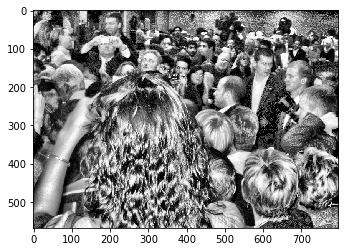

In [22]:
w = 100
cdfs = fast_lhe(he2, w)
he2_lhe = interp_lhe(he2, cdfs, w)
he2_lhe = he2_lhe[w//2:-w//2, w//2:-w//2]
plt.imshow(he2_lhe, cmap='gray')

(618, 847)
window size: 50 time: 38.73575139045715
(668, 897)
window size: 100 time: 31.12030863761902
(718, 947)
window size: 150 time: 31.57991313934326
(768, 997)
window size: 200 time: 31.102304220199585


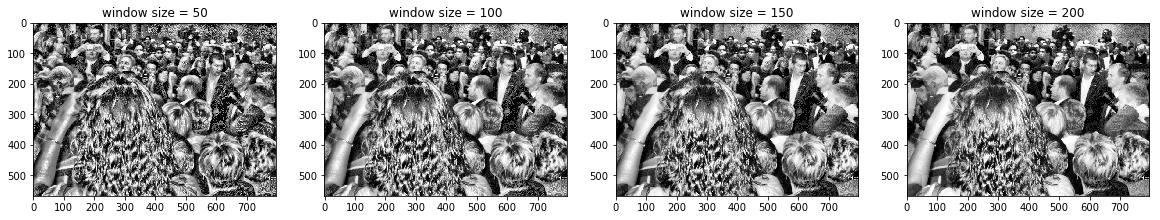

In [25]:
import time
window_sizes = [50, 100, 150, 200]
fig, axs = plt.subplots(1,4, figsize=(20,4))
for i, w in enumerate(window_sizes):
    t0 = time.time()
    cdfs = fast_lhe(he2, w)
    he2_lhe = interp_lhe(he2, cdfs, w)
    print('window size:', w, 'time:', time.time() - t0)
    he2_lhe = he2_lhe[w//2:-w//2, w//2:-w//2]
    axs[i].imshow(he2_lhe, cmap='gray')
    axs[i].set_title('window size = {}'.format(w))
plt.show()

As evident, smaller window sizes result in an unbalanced image with a lot of noise (as it amplifies the contrast in noisy areas). Hoerver, better results are achieved for `window_size = 150`. Approaching a window size of 200 is not recommended, as it approximates the global HE.
Note the change in image dimensions, larger window size results in a thicker padding, however the core image size remains the same. We can use cropping to remove the padding.
Below table shows the result of different window sizes on all four images, with paddings removed.

(562, 562)
(612, 612)
(662, 662)
(712, 712)
(618, 847)
(668, 897)
(718, 947)
(768, 997)
(650, 850)
(700, 900)
(750, 950)
(800, 1000)
(649, 849)
(699, 899)
(749, 949)
(799, 999)


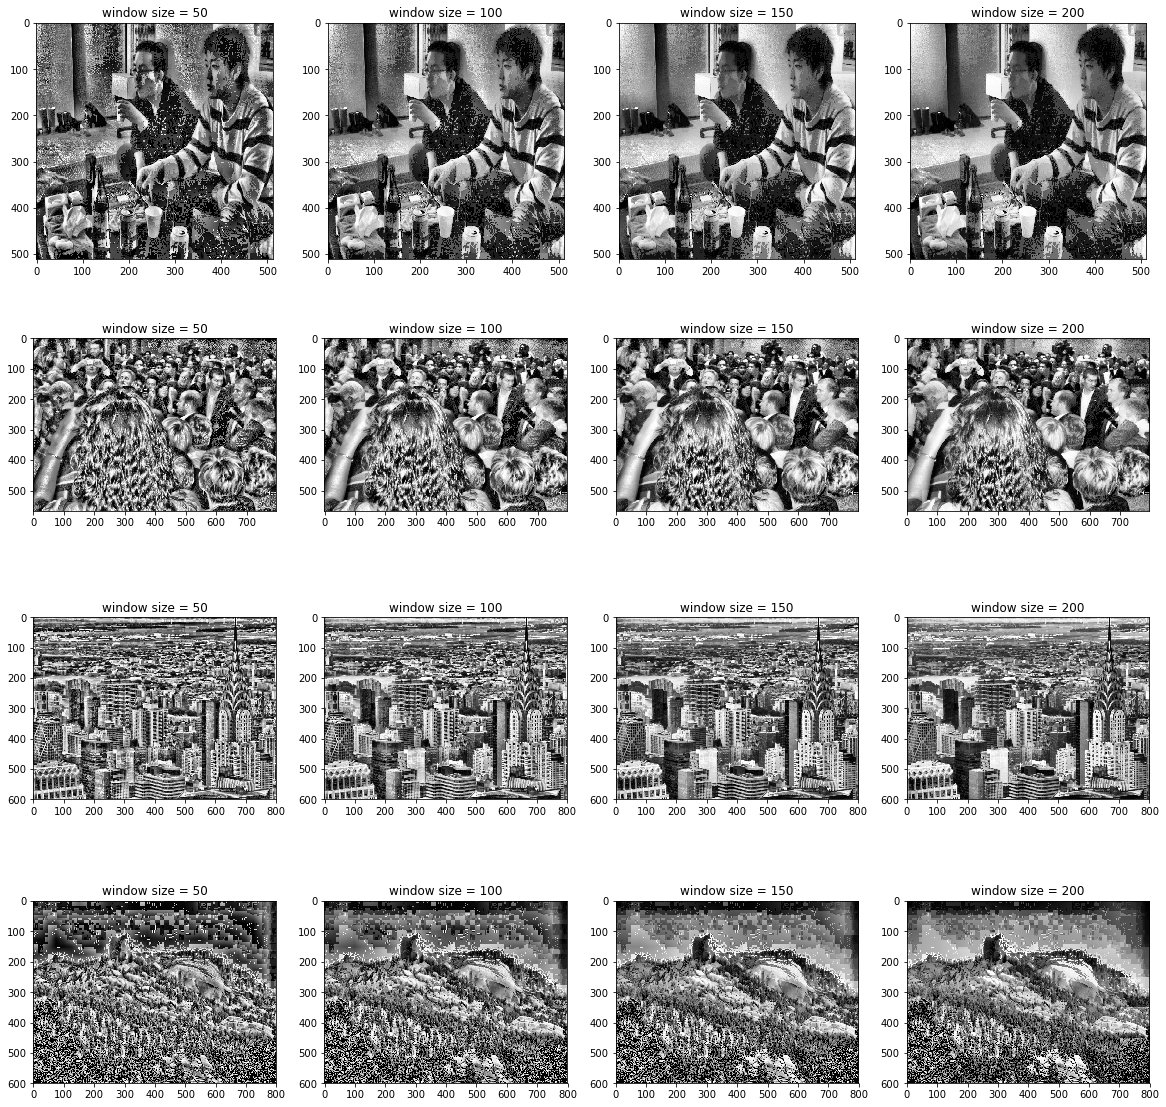

In [65]:
fig, axs = plt.subplots(4, 4, figsize=(20,20))
imgs = [he1, he2, he3, he4]
window_sizes = [50, 100, 150, 200]
for i, img in enumerate(imgs):
    for j, w in enumerate(window_sizes):
        cdfs = fast_lhe(img, w)
        img_lhe = interp_lhe(img, cdfs, w)
        # crop the image to the original size
        img_lhe = img_lhe[w//2:-w//2, w//2:-w//2]
        axs[i,j].imshow(img_lhe, cmap='gray')
        axs[i,j].set_title('window size = {}'.format(w))
plt.show()